## Problem 4 \[4 points\]: Toffoli gate

Write the algorithm which realized reversible AND operation using the
Toffoli gate. Give the link to the \[Jupyter notebook.\]

In the process of solving the following sources were used: https://qiskit.org/textbook/preface.html,  Quantum Algorithm Implementations for Beginners, Abhijith J., Adetokunbo Adedoyin, arXiv:1804.03719

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

In [2]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

AND with inputs 0 0 gives output 0


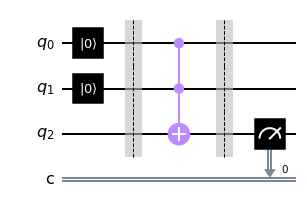



AND with inputs 0 1 gives output 0


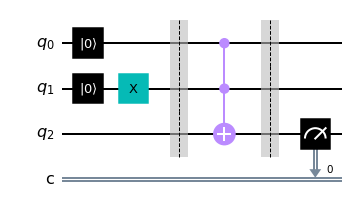



AND with inputs 1 0 gives output 0


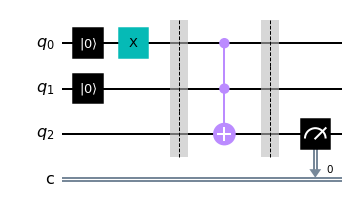



AND with inputs 1 1 gives output 1


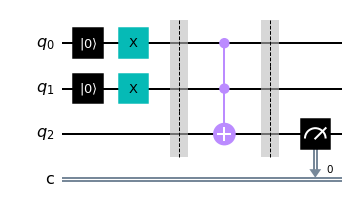

In [3]:
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw('mpl'))
        print('\n')

Reversibility of qubits encoding bits {0,1} directly follows from the operation of identity